In [1]:
import sys

if ".." not in sys.path:
    sys.path.append("..")

import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from collections import defaultdict
from pprint import pprint
from time import process_time

from common.task import path_join, load_ground_truths, get_best_bag_of_features_histograms
from common.evaluation import SegmentfreeWordSpottingEvaluator

%load_ext autoreload
%autoreload 2
%matplotlib widget
%matplotlib inline

In [3]:
img_path = '2700270'
n_centroids = 100
step_size = 30
# load ground truth for image 2700270.png
visual_words = load_ground_truths('2700270.gtp') 
visual_word = visual_words[83]
print(f"{visual_word=}")

visual_word=(916, 1454, 1142, 1533, 'officers')


In [4]:
rv = get_best_bag_of_features_histograms('2700270.png', visual_word[:4], n_centroids, step_size)

# Visualization

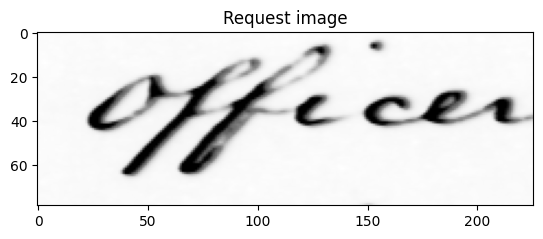

In [5]:
x1, y1, x2, y2, _ = visual_word
document = Image.open(path_join('pages', '2700270.png'))
doc_arr = np.asarray(document, dtype='uint8')
req_arr = doc_arr[y1:y2, x1:x2]

plt.imshow(req_arr, cmap=cm.get_cmap("Greys_r"))
plt.title("Request image")
plt.show()

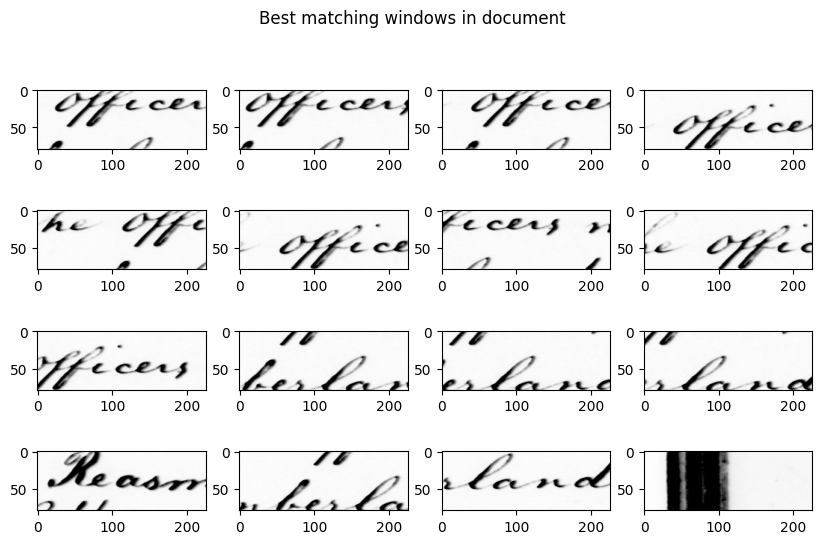

In [6]:
row_cols = 4
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Best matching windows in document")

for idx, info in enumerate(rv):
    if idx == row_cols**2:
        break

    wx, wy, wxx, wyy = info['window']
    ax = fig.add_subplot(row_cols, row_cols, idx + 1)
    subimg = doc_arr[wy:wyy, wx:wxx]
    ax.imshow(subimg, cmap=cm.get_cmap('Greys_r'))

# Evaluation

In [7]:
# 3 - and
# 4 - instructions
# 5 - october
# 83 - officers

img_path = '2700270.png'
n_centroids = 200
step_size = 30
word_index = 5
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path,
    n_centroids,
    step_size
)

result = sfwse.crossvalidate(word_index, max_eval_length)
prec, rec, mean_prec = result
print(f"{prec=} {rec=} {mean_prec=}")

Evaluating word (1568, 146, 1814, 246, 'october')


/Users/dh/projects/group_fpda/fachprojekt/lib/python3.10/site-packages/scipy/cluster/vq.py:603: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


prec=0.6 rec=2.0 mean_prec=2.0


In [ ]:
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path='2710271.png',
    n_centroids=100,
    step_size=30
)

start_time = process_time()
avg_prec, avg_rec, avg_mean_prec, overall_precision, overall_recall, overall_mean_prec = sfwse.validate(max_eval_length)
end_time = process_time()

print(f"Needed time: {(end_time - start_time)} secs")
print('#' * 48)
print(f"{avg_prec=}")
print(f"{avg_rec=}")
print(f"{avg_mean_prec=}")
print('#' * 48)
pprint(f"{overall_precision=}")
pprint(f"{overall_recall=}")
pprint(f"{overall_mean_prec=}")

In [2]:
# Evaluate word spotter over all images in directory

max_eval_length = 10
results_dict = {}

for page in sorted(os.listdir(path_join('pages'))):
    print(f"Starting to evaluate page {page}...")
    sfwse = SegmentfreeWordSpottingEvaluator(
        img_path='2710271.png',
        n_centroids=100,
        step_size=30
    )
    page_results = sfwse.validate(max_eval_length)
    results_dict[page] = page_results

Starting to evaluate page 2700270.png...
Starting to evaluate page 2710271.png...
Starting to evaluate page 2720272.png...
Starting to evaluate page 2730273.png...
Starting to evaluate page 2740274.png...
Starting to evaluate page 2750275.png...
Starting to evaluate page 2760276.png...
Starting to evaluate page 2770277.png...
Starting to evaluate page 2780278.png...
Starting to evaluate page 2790279.png...
Starting to evaluate page 3000300.png...
Starting to evaluate page 3010301.png...
Starting to evaluate page 3020302.png...
Starting to evaluate page 3030303.png...
Starting to evaluate page 3040304.png...
Starting to evaluate page 3050305.png...
Starting to evaluate page 3060306.png...
Starting to evaluate page 3070307.png...
Starting to evaluate page 3080308.png...
Starting to evaluate page 3090309.png...


In [ ]:
pprint(results_dict)